In [2]:
import pandas as pd
import numpy as np
import os


In [3]:
mainpath = "datasets/"
filename = "titanic/train.csv"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv (fullpath)

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data = data.drop(['Cabin','Name','Ticket'], axis=1)
data = data[data['Embarked'].notna()]
data['Age'] = data['Age'].fillna(-1)

### Datos ordinales

data['Embarked'] = data['Embarked'].map({'Q': 2, 'C': 1, 'S': 0})
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})

data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,-1.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [6]:
data.describe() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,23.541249,0.524184,0.382452,32.096681,0.362205
std,256.998173,0.486260,0.834700,0.477538,17.834487,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [7]:
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees 

In [8]:
y = data['Survived']
x = data.drop(['Survived'], axis=1)

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [9]:

modelo = ExtraTreesClassifier() 
erec = RFE(modelo)  
erec = erec.fit(x, y)


In [10]:
columnas = list(x.columns.values)
atrib = erec.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['PassengerId', 'Sex', 'Age', 'Fare']

In [24]:
from sklearn.model_selection import train_test_split
x2= data[['PassengerId', 'Sex', 'Age', 'Fare']]
y2 = y
x_train,x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=2)


In [25]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

Text(0.5, 1.0, 'Confusion matrix')

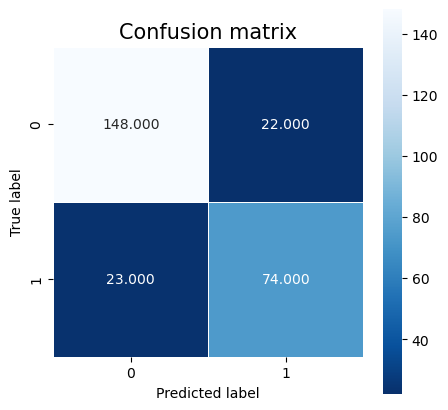

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score 

y_pred = lr.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)

Sin entrenar: ROC AUC=0.500
Regresión Logística: auc=0.795 f1=0.767 


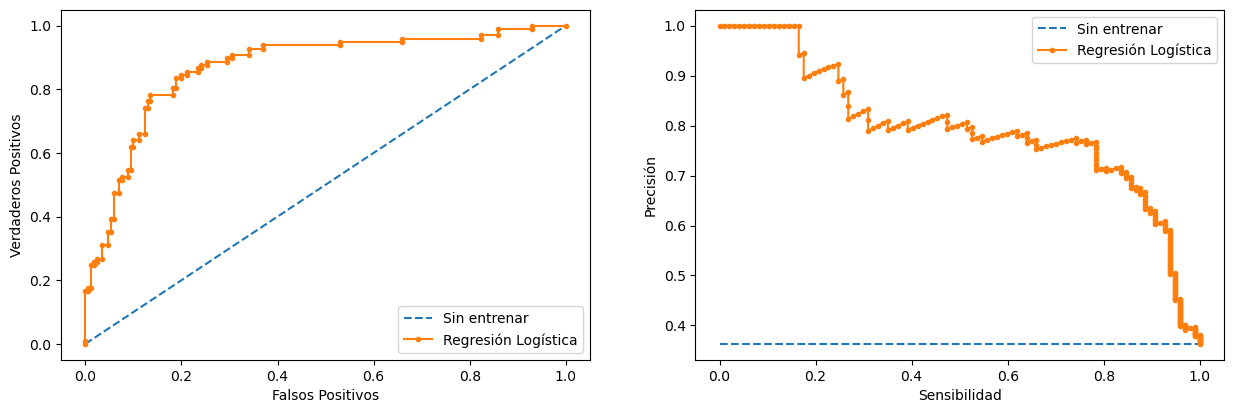

In [28]:
#Curva ROC y AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Generamos un clasificador sin entrenar ,  0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Predecimos las probabilidades entrenando con lr
lr_probs = lr.predict_proba(x_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
#print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


# PR y F1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
print('Regresión Logística: auc=%.3f f1=%.3f ' % (lr_auc, lr_f1))
no_train = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()

plt.subplot(2,2,2)
plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.legend()
plt.show()